# **Hands-on Activity 11.1 Linear Regression Analysis**
| Course: CPE 311 | Program: BSCpE |
|--- | --- |
| **Course Title**: Computational Thinking with Python | **Date Performed:** April 27 , 2024 |
| **Section:** BSCPE22S3 | **Date Submitted:** April 28, 2024 |
| **Student Name**: John Louie V. Adornado | **Instructor's Name:** Engr. Roman Richard |

In [40]:
pip install hvplot

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [42]:
df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [43]:
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [45]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [46]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [47]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [48]:
nullv = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'GDP', 'Population',' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling']
for i in nullv:
    mean = df[i].mean()
    df[i].fillna(value=mean, inplace = True)

In [50]:

print(df.columns)


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [51]:
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


# **Exploratory Data Analysis(EDA)**

In [59]:
columns_of_interest = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', ' HIV/AIDS']
df_subset = df[columns_of_interest]

summary_stats = df_subset.describe()
print(summary_stats)

       Life expectancy   Adult Mortality  infant deaths      Alcohol  \
count       2938.000000      2938.000000    2938.000000  2938.000000   
mean          69.224932       164.796448      30.303948     4.602861   
std            9.507640       124.080302     117.926501     3.916288   
min           36.300000         1.000000       0.000000     0.010000   
25%           63.200000        74.000000       0.000000     1.092500   
50%           72.000000       144.000000       3.000000     4.160000   
75%           75.600000       227.000000      22.000000     7.390000   
max           89.000000       723.000000    1800.000000    17.870000   

          HIV/AIDS  
count  2938.000000  
mean      1.742103  
std       5.077785  
min       0.100000  
25%       0.100000  
50%       0.100000  
75%       0.800000  
max      50.600000  


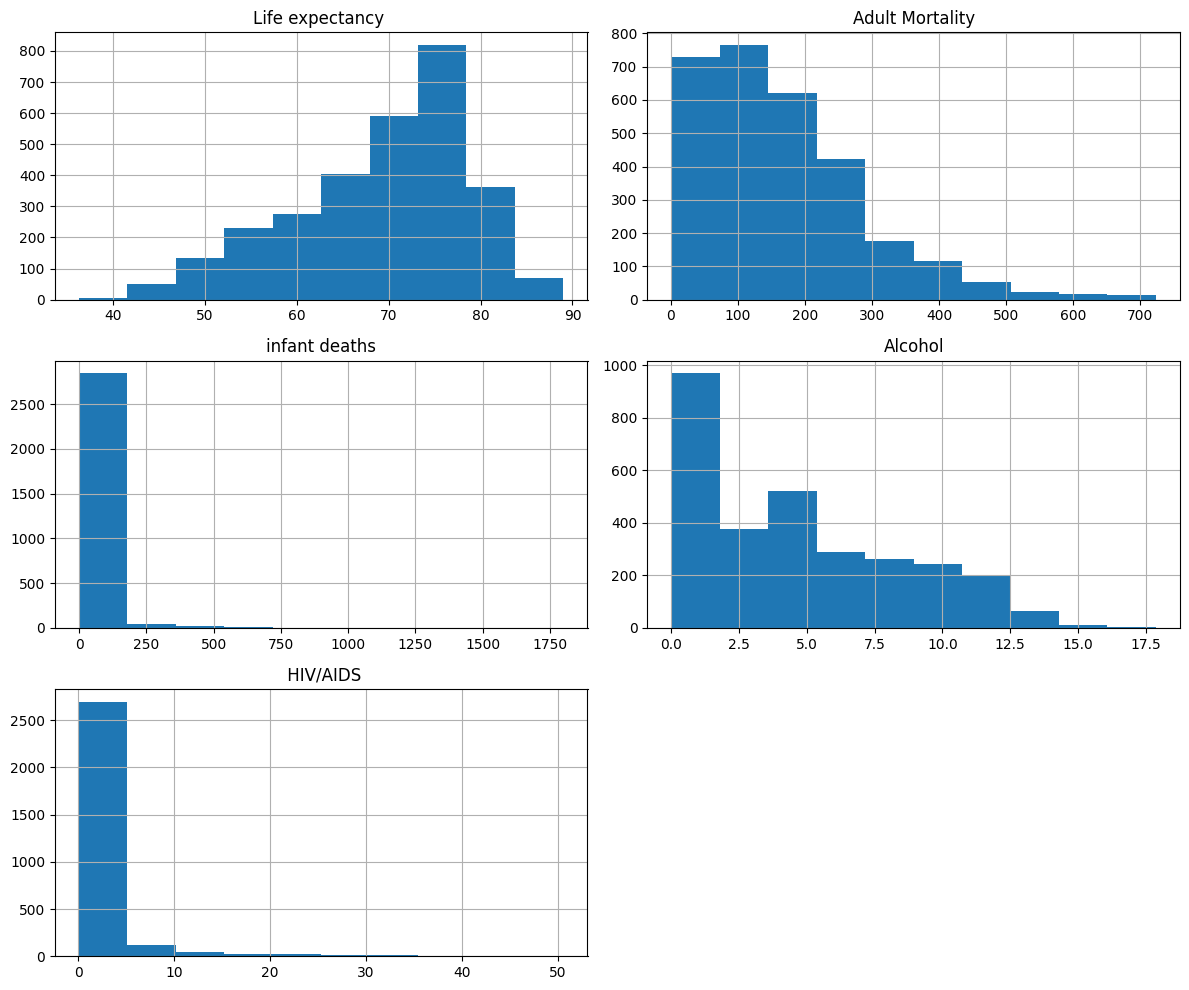

In [60]:
df_subset.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

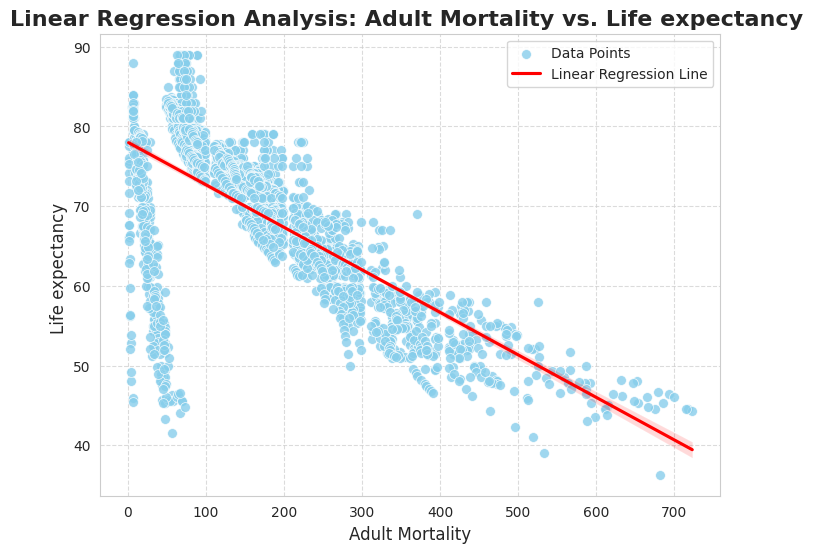

In [82]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Adult Mortality', y='Life expectancy ', s=50, alpha=0.8, color='skyblue', ax=ax)
sns.regplot(data=df, x='Adult Mortality', y='Life expectancy ', scatter=False, color='red', ax=ax)

plt.title('Linear Regression Analysis: Adult Mortality vs. Life expectancy ', fontsize=16, weight='bold')
plt.xlabel('Adult Mortality', fontsize=12)
plt.ylabel('Life expectancy ', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Data Points', 'Linear Regression Line'], loc='upper right')
plt.show()



Meaning that with a higher adult mortality rates have a lower life expectancy.

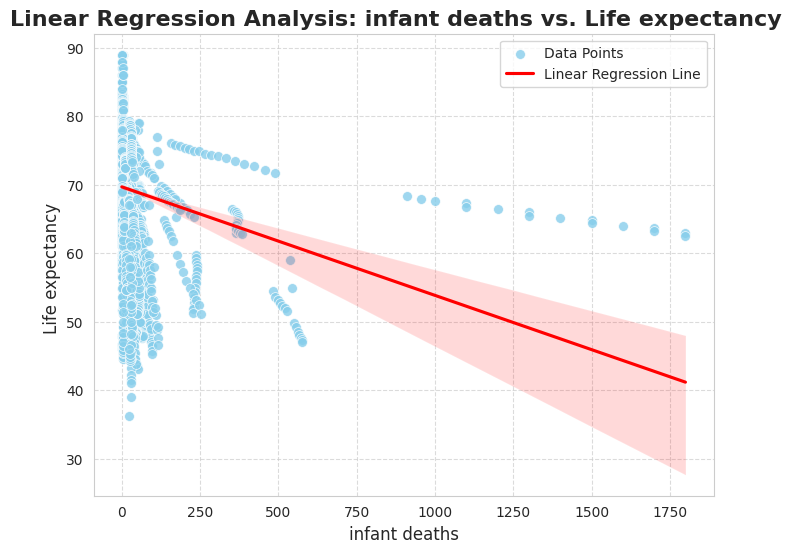

In [84]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='infant deaths', y='Life expectancy ', s=50, alpha=0.8, color='skyblue', ax=ax)
sns.regplot(data=df, x='infant deaths', y='Life expectancy ', scatter=False, color='red', ax=ax)

plt.title('Linear Regression Analysis: infant deaths vs. Life expectancy  ', fontsize=16, weight='bold')
plt.xlabel('infant deaths', fontsize=12)
plt.ylabel('Life expectancy ', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Data Points', 'Linear Regression Line'], loc='upper right')
plt.show()


Indicating that higher infant mortality rates have a lower life expectancy.

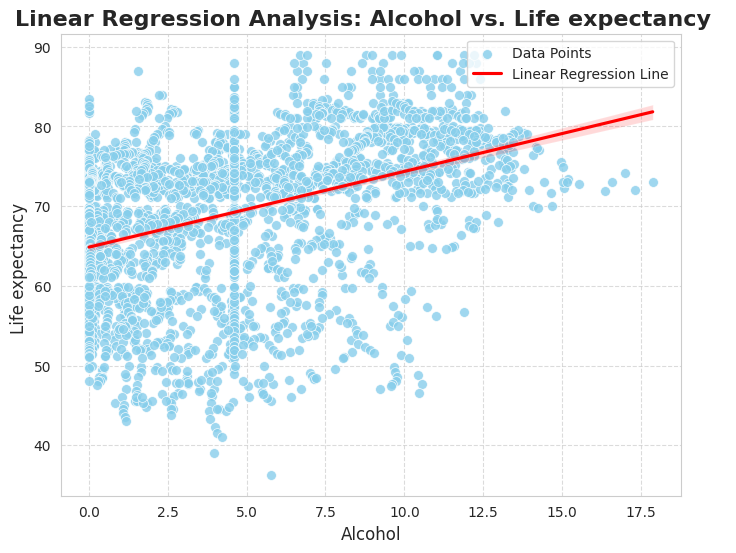

In [85]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Alcohol', y='Life expectancy ', s=50, alpha=0.8, color='skyblue', ax=ax)
sns.regplot(data=df, x='Alcohol', y='Life expectancy ', scatter=False, color='red', ax=ax)

plt.title('Linear Regression Analysis: Alcohol vs. Life expectancy  ', fontsize=16, weight='bold')
plt.xlabel('Alcohol', fontsize=12)
plt.ylabel('Life expectancy ', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Data Points', 'Linear Regression Line'], loc='upper right')
plt.show()


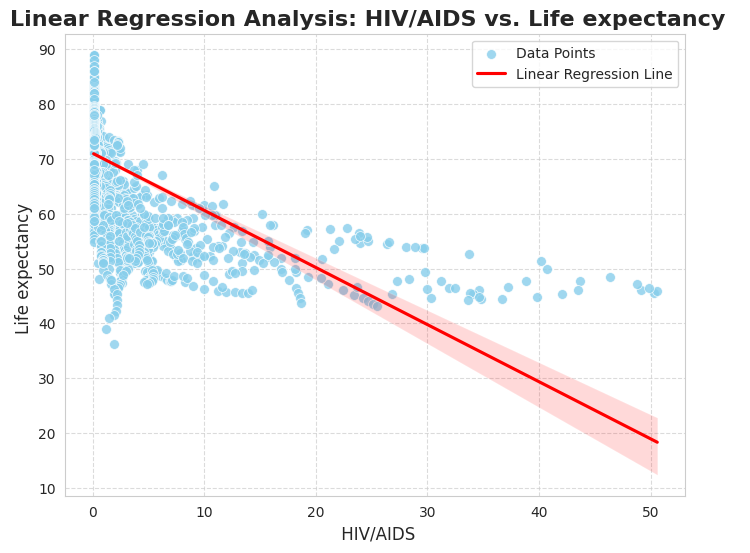

In [87]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x=' HIV/AIDS', y='Life expectancy ', s=50, alpha=0.8, color='skyblue', ax=ax)
sns.regplot(data=df, x=' HIV/AIDS', y='Life expectancy ', scatter=False, color='red', ax=ax)

plt.title('Linear Regression Analysis: HIV/AIDS vs. Life expectancy  ', fontsize=16, weight='bold')
plt.xlabel(' HIV/AIDS', fontsize=12)
plt.ylabel('Life expectancy ', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Data Points', 'Linear Regression Line'], loc='upper right')
plt.show()


as higher HIV/AIDS rates are typically have a lower life expectancy due to the impact of the disease on health and mortality rates.

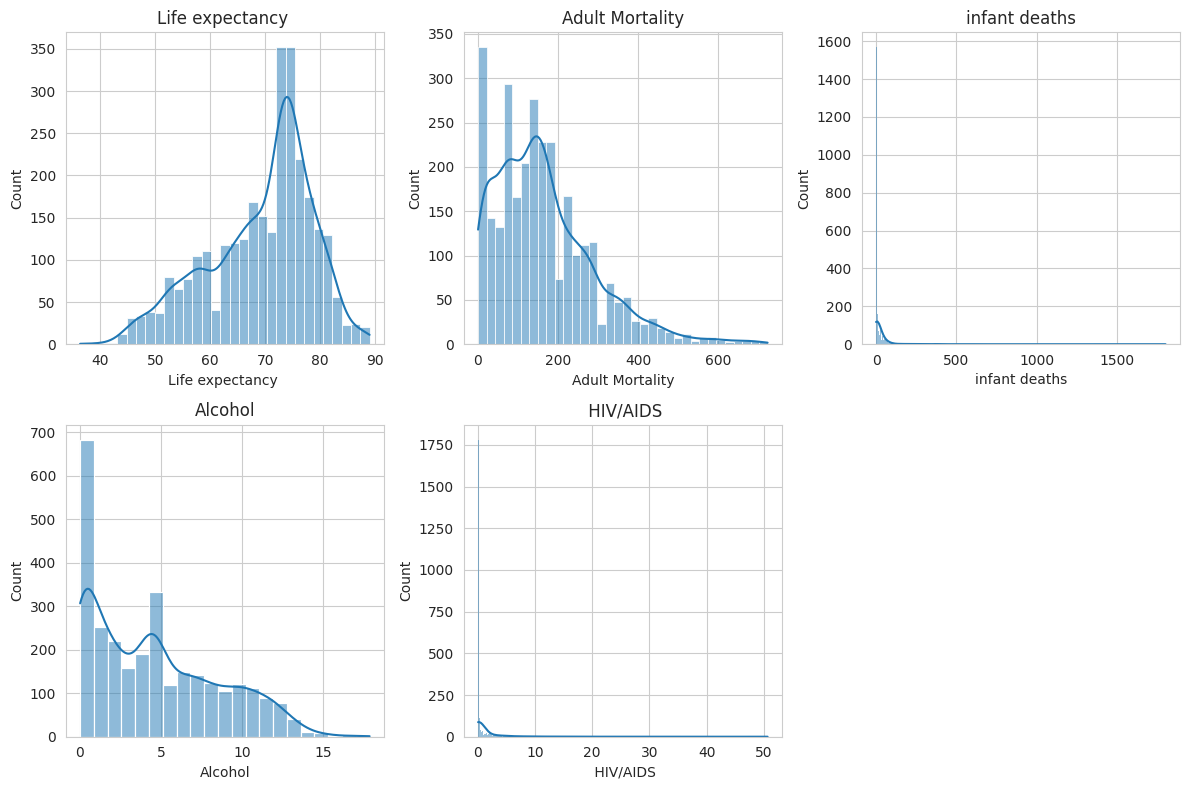

In [89]:
important_variables = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', ' HIV/AIDS']

# Subset the dataframe
selected_df = df[important_variables]

# Plot histograms for each variable
plt.figure(figsize=(12, 8))
for i, variable in enumerate(selected_df.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(selected_df[variable], kde=True)
    plt.title(variable)
plt.tight_layout()
plt.show()

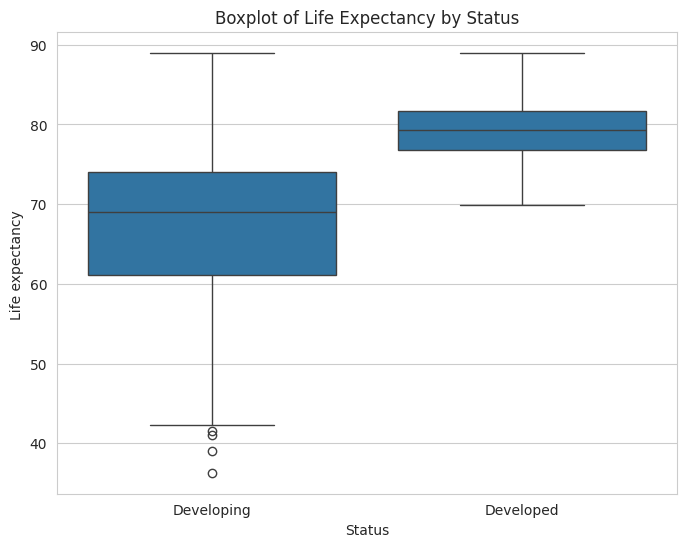

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=df)
plt.title('Boxplot of Life Expectancy by Status')
plt.show()

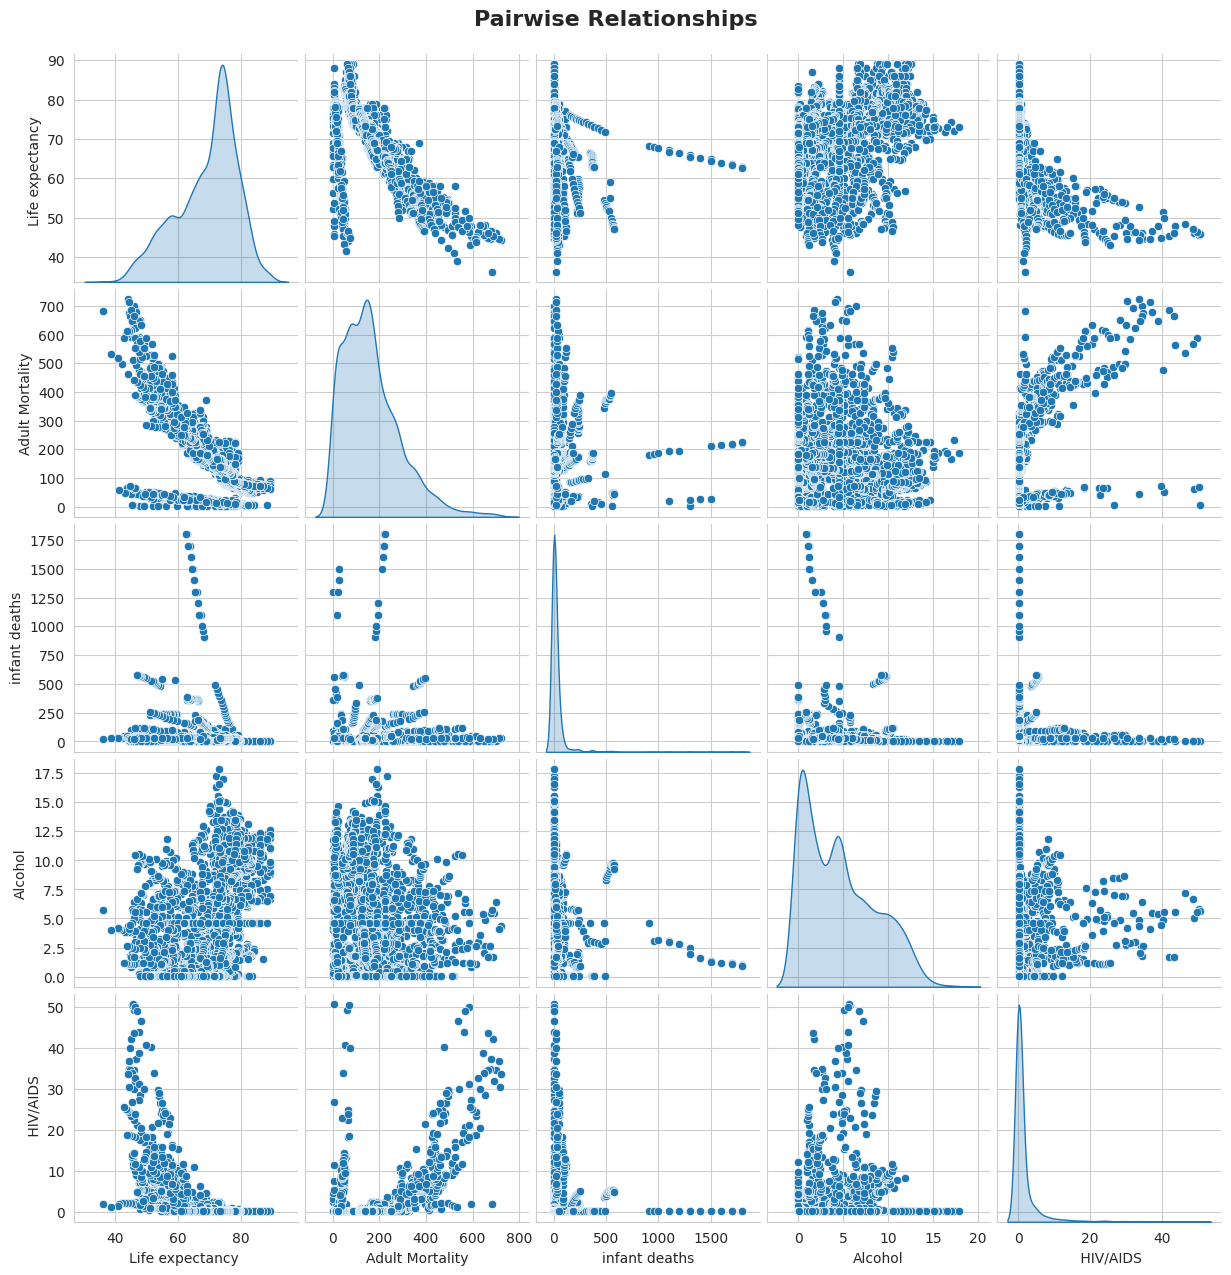

In [90]:
sns.pairplot(selected_df, diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02, fontsize=16, weight='bold')
plt.show()

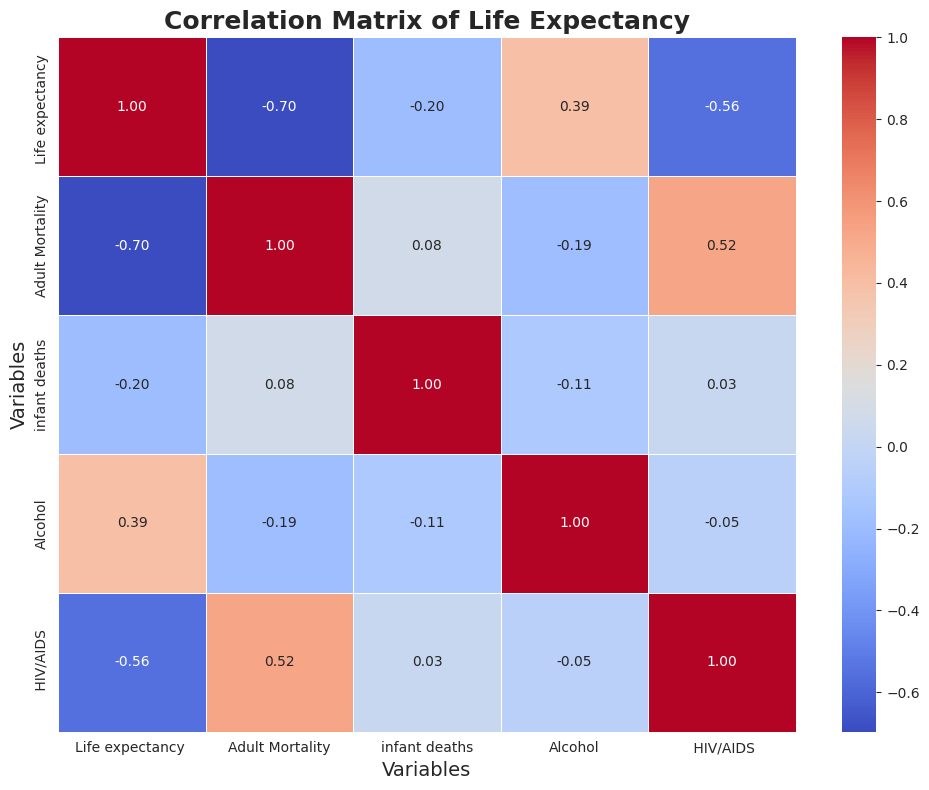

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = selected_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Life Expectancy', fontsize=18, weight='bold')

plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

plt.tight_layout()
plt.show()

In [94]:
print("Summary of Correlations:")
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        variable1 = correlation_matrix.index[i]
        variable2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]
        if correlation > 0:
            print(f"The correlation between '{variable1}' and '{variable2}' is positive: {correlation:.2f}")
        elif correlation < 0:
            print(f"The correlation between '{variable1}' and '{variable2}' is negative: {correlation:.2f}")

Summary of Correlations:
The correlation between 'Life expectancy ' and 'Adult Mortality' is negative: -0.70
The correlation between 'Life expectancy ' and 'infant deaths' is negative: -0.20
The correlation between 'Life expectancy ' and 'Alcohol' is positive: 0.39
The correlation between 'Life expectancy ' and ' HIV/AIDS' is negative: -0.56
The correlation between 'Adult Mortality' and 'infant deaths' is positive: 0.08
The correlation between 'Adult Mortality' and 'Alcohol' is negative: -0.19
The correlation between 'Adult Mortality' and ' HIV/AIDS' is positive: 0.52
The correlation between 'infant deaths' and 'Alcohol' is negative: -0.11
The correlation between 'infant deaths' and ' HIV/AIDS' is positive: 0.03
The correlation between 'Alcohol' and ' HIV/AIDS' is negative: -0.05


In [95]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [96]:
iris = load_iris()
X = iris.data[:, 2].reshape(-1, 1)
y = iris.data[:, 3]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
model = LinearRegression()

In [99]:
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)

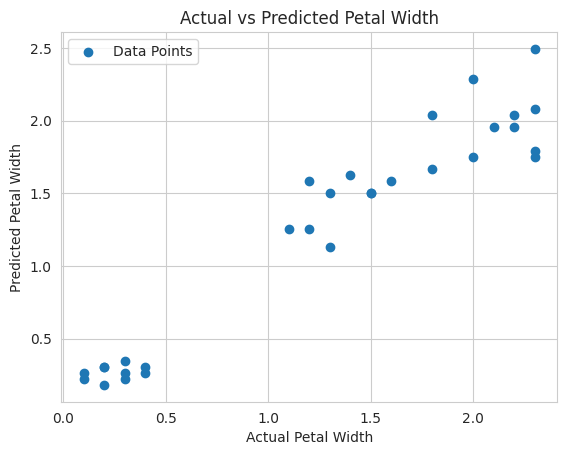

In [101]:
import matplotlib.pyplot as plt


plt.scatter(y_test, y_pred, label='Data Points')
plt.xlabel('Actual Petal Width')
plt.ylabel('Predicted Petal Width')
plt.title('Actual vs Predicted Petal Width')


plt.legend()

plt.show()



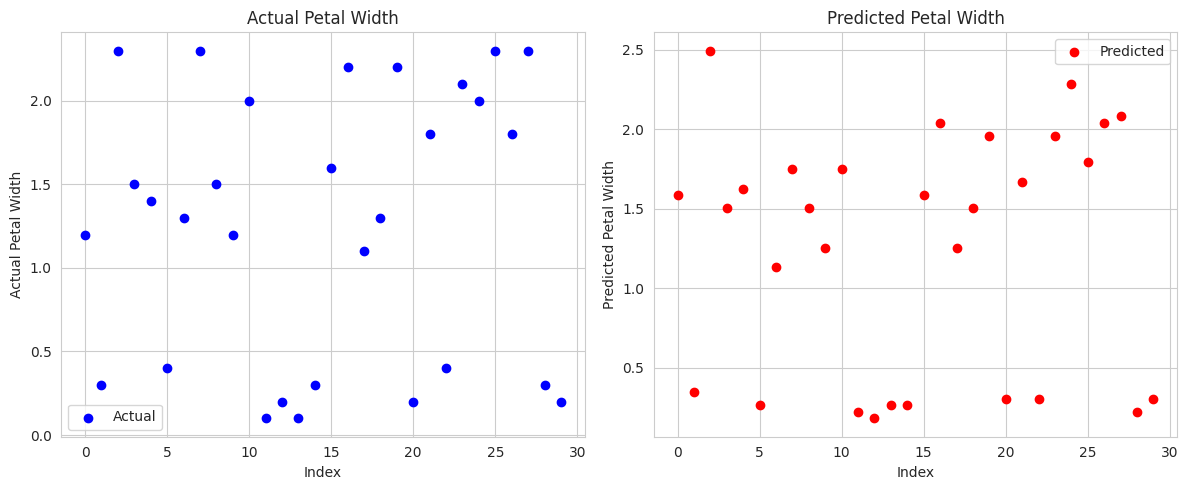

In [102]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Actual Petal Width
ax1.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
ax1.set_xlabel('Index')
ax1.set_ylabel('Actual Petal Width')
ax1.set_title('Actual Petal Width')
ax1.legend()

# Plot for Predicted Petal Width
ax2.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
ax2.set_xlabel('Index')
ax2.set_ylabel('Predicted Petal Width')
ax2.set_title('Predicted Petal Width')
ax2.legend()

plt.tight_layout()
plt.show()


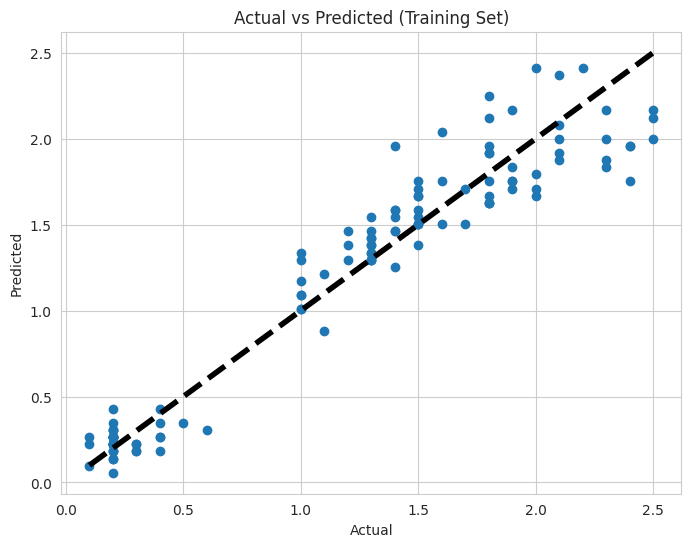

In [105]:
y_train_pred = model.predict(X_train)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Training Set)')
plt.show()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

# Displaying evaluation metrics
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)

Mean Absolute Error (MAE): 0.16818126256563326
Mean Squared Error (MSE): 0.045604284097661846
Root Mean Squared Error (RMSE): 0.21355159586774772


By these insights, healthcare professionals can develop to improve public health outcomes and enhance life expectancy worldwide.